### Importing Packages

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Dataset

The Quora Question Pairs dataset was uploaded to Google Drive, and the drive was mounted to Colab.

In [57]:
df = pd.read_csv('/content/drive/MyDrive/ay2324 sem1/cs3244/project/train.csv')

In [58]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [61]:
print(f"Initial dataframe has {len(df)} rows.")
null_rows = df[df.isnull().values.any(1)]
print(f"Dataframe has {len(null_rows)} null rows.")
df = df.dropna(how='any')
print(f"Dataframe has {len(df)} rows after removing null values.")

Initial dataframe has 404290 rows.
Dataframe has 3 null rows.
Dataframe has 404287 rows after removing null values.


In [84]:
num_samples = len(df)
num_samples

404287

### WordCloud

(-0.5, 359.5, 269.5, -0.5)

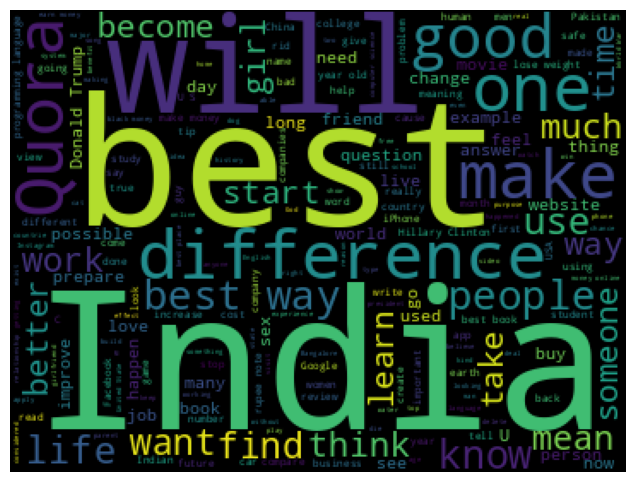

In [69]:
all_questions_concat = df['question1'].str.cat(sep=' ') + df['question2'].str.cat(sep=' ')

from wordcloud import WordCloud
cloud = WordCloud(width=360, height=270).generate(all_questions_concat)
plt.figure(figsize=(10, 6))
plt.imshow(cloud)
plt.axis('off')

### Data Preprocessing and Cleaning (Incomplete)

In [70]:
!python -m nltk.downloader stopwords

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [71]:
import re
import string
from nltk.corpus import stopwords

def clean_text(text, remove_stopwords=False):
  text = text.lower() # lower case
  text = re.sub(f"[{re.escape(string.punctuation)}]", '', text) # remove punctuation
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text) # remove special chars

  if remove_stopwords:
    sw = set(stopwords.words("english"))
    text = ' '.join([word for word in text.split() if word not in sw])

  return text

demo_qn = "What's the meaning of life? #@"
clean_text(demo_qn), clean_text(demo_qn, remove_stopwords=True)

('whats the meaning of life ', 'whats meaning life')

In [72]:
df['cleaned_question1'] = df['question1'].apply(clean_text)
df['cleaned_question2'] = df['question2'].apply(clean_text)
df.head(10)

,id,qid1,qid2,question1,question2,is_duplicate,cleaned_question1,cleaned_question2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,what is the story of kohinoor kohinoor diamond,what would happen if the indian government sto...
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,why am i mentally very lonely how can i solve it,find the remainder when math2324math is divide...
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1,astrology i am a capricorn sun cap moon and ca...,im a triple capricorn sun moon and ascendant i...
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0,should i buy tiago,what keeps childern active and far from phone ...
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1,how can i be a good geologist,what should i do to be a great geologist
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0,when do you use instead of,when do you use instead of and
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0,motorola company can i hack my charter motorol...,how do i hack motorola dcx3400 for free internet


### Checking for Duplicate Questions

In [27]:
question_ids = df['qid1'].to_list() + df['qid2'].to_list()
print(f"Total number of questions: {len(question_ids)}")

question_ids = pd.DataFrame(question_ids, columns=["qid"])
print(f"Unique questions: {len(question_ids['qid'].unique())}")

Total number of questions: 808574
Unique questions: 537929


In [73]:
question_counts = question_ids.value_counts()
question_counts

qid   
2559      157
30782     120
4044      111
2561       88
14376      79
         ... 
223730      1
223729      1
223728      1
223727      1
537933      1
Length: 537929, dtype: int64

In [75]:
# look at an example of a duplicate question
dup = df[(df['qid1'] == 2559) | (df['qid2'] == 2559)]
dup

,id,qid1,qid2,question1,question2,is_duplicate,cleaned_question1,cleaned_question2
1283,1283,2558,2559,Why do I not lose weight when I throw up?,What are the best ways to lose weight?,0,why do i not lose weight when i throw up,what are the best ways to lose weight
2290,2290,4554,2559,Is it possible to reduce 17 lbs in one month?,What are the best ways to lose weight?,0,is it possible to reduce 17 lbs in one month,what are the best ways to lose weight
8765,8765,9036,2559,What is the quickest possible way to lose weight?,What are the best ways to lose weight?,0,what is the quickest possible way to lose weight,what are the best ways to lose weight
9001,9001,17518,2559,How can I gain weight within 2 month?,What are the best ways to lose weight?,0,how can i gain weight within 2 month,what are the best ways to lose weight
12247,12247,23609,2559,Can I loose my weight around 10kg in 25 days?,What are the best ways to lose weight?,0,can i loose my weight around 10kg in 25 days,what are the best ways to lose weight
...,...,...,...,...,...,...,...,...
391318,391318,127608,2559,What are the best laxatives to lose weight?,What are the best ways to lose weight?,0,what are the best laxatives to lose weight,what are the best ways to lose weight
398584,398584,297857,2559,Is it possible to lose 25 pound in 1 month?,What are the best ways to lose weight?,0,is it possible to lose 25 pound in 1 month,what are the best ways to lose weight
398968,398968,4043,2559,What are some ways to lose 25 pounds in one mo...,What are the best ways to lose weight?,0,what are some ways to lose 25 pounds in one month,what are the best ways to lose weight
401245,401245,534635,2559,"I'm 5'2, 105 pounds, 19, and a female. I run 2...",What are the best ways to lose weight?,0,im 52 105 pounds 19 and a female i run 20 30 ...,what are the best ways to lose weight


In [85]:
# questions that appear more than once
dup_questions = question_counts[question_counts > 1]
dup_questions

qid   
2559      157
30782     120
4044      111
2561       88
14376      79
         ... 
312250      2
44805       2
7083        2
290851      2
9685        2
Length: 111778, dtype: int64

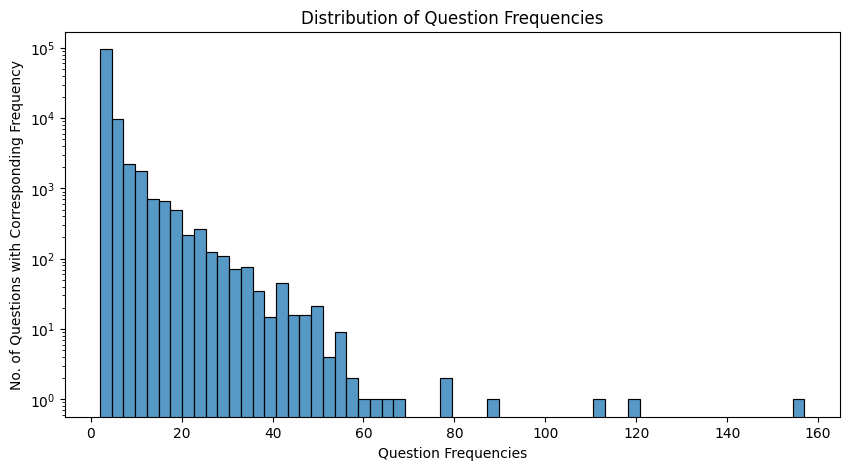

In [86]:
plt.figure(figsize=(10,5))
sns.histplot(data=dup_questions, bins=60)
plt.xlabel('Question Frequencies')
plt.ylabel('No. of Questions with Corresponding Frequency')
plt.yscale('log')
plt.title('Distribution of Question Frequencies')
plt.show()

### Checking for Duplicate Rows

In [87]:
pair_counts = df[['qid1', 'qid2']].groupby(['qid1', 'qid2']).count().reset_index()
has_duplicate_pairs = not (len(pair_counts) == num_samples)
print(f'There are {"" if has_duplicate_pairs else "no "}duplicate pairs.')

There are no duplicate pairs.


### Checking for Class Imbalance

In [88]:
pos_class_count = len(df[df['is_duplicate'] == 1])
neg_class_count = num_samples - pos_class_count

pos_percentage = (pos_class_count / num_samples) * 100
neg_percentage = (neg_class_count / num_samples) * 100

print(f'Number of question pairs classified as duplicate: {pos_class_count}, ({pos_percentage:.2f}%)')
print(f'Number of question pairs classified as not duplicate: {neg_class_count}, ({neg_percentage:.2f}%)')

Number of question pairs classified as duplicate: 149263, (36.92%)
Number of question pairs classified as not duplicate: 255024, (63.08%)


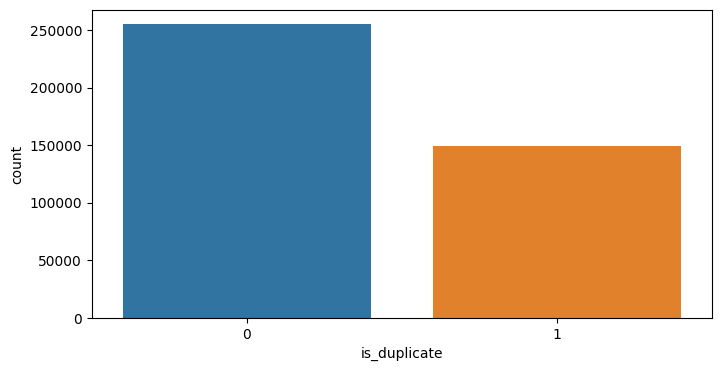

In [89]:
plt.figure(figsize=(8, 4))
sns.countplot(x='is_duplicate', data=df)
plt.xlabel('is_duplicate')
plt.ylabel('count')

plt.show()

### Word Count Analysis

I think this might help in determining the neural network architecture to use? The max question length is around 200 which might not work well if we are using RNNs, i.e. RNNs generally work well for shorter sequences.

In [90]:
# find word counts of questions
df['question1_word_count'] = df['cleaned_question1'].apply(lambda x: len(str(x).split()))
df['question2_word_count'] = df['cleaned_question2'].apply(lambda x: len(str(x).split()))
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,cleaned_question1,cleaned_question2,question1_word_count,question2_word_count
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,14,12
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,what is the story of kohinoor kohinoor diamond,what would happen if the indian government sto...,8,13
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,14,10
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,why am i mentally very lonely how can i solve it,find the remainder when math2324math is divide...,11,9
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,13,7


Min word count for question 1: 0
Min word count for question 2: 0
Max word count for question 1: 125
Max word count for question 2: 237


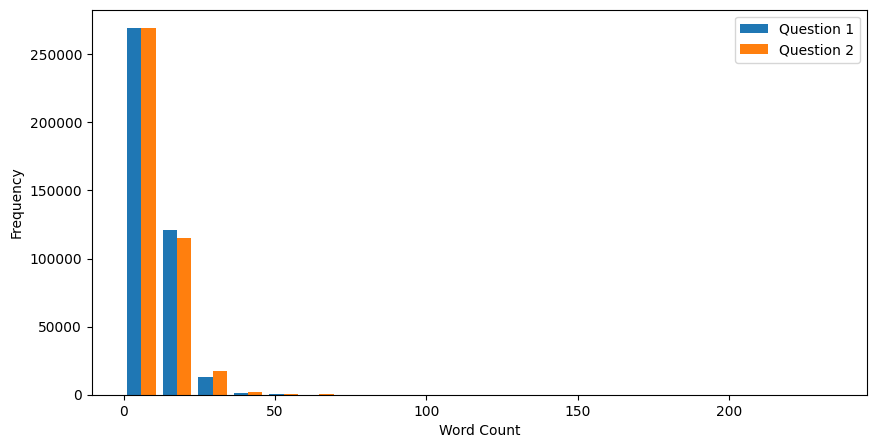

In [91]:
print(f"Min word count for question 1: {df['question1_word_count'].min()}")
print(f"Min word count for question 2: {df['question2_word_count'].min()}")

print(f"Max word count for question 1: {df['question1_word_count'].max()}")
print(f"Max word count for question 2: {df['question2_word_count'].max()}")

plt.figure(figsize=(10, 5))
plt.hist([df['question1_word_count'], df['question2_word_count']], bins=20, label=['Question 1', 'Question 2'], range=(0, 235))
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()

In [93]:
df[(df['question1_word_count'] == 0) | (df['question2_word_count'] == 0)].head()

,id,qid1,qid2,question1,question2,is_duplicate,cleaned_question1,cleaned_question2,question1_word_count,question2_word_count
3306,3306,6553,6554,.,Why is Cornell's endowment the lowest in the I...,0,,why is cornells endowment the lowest in the iv...,0,10
13016,13016,25026,25027,?,Why should one not work at Google?,0,,why should one not work at google,0,7
20072,20072,37898,37899,How could I solve this?,…………..,0,how could i solve this,,5,0
20794,20794,39204,39205,?,What is the Gmail tech support help phone number?,0,,what is the gmail tech support help phone number,0,9
47056,47056,84067,84068,Is there anywhere in the world offering pain m...,?,0,is there anywhere in the world offering pain m...,,19,0


In [94]:
word_count_bins = 20
hist, bin_edges = np.histogram(df['question1_word_count'], bins=word_count_bins)

bin_with_highest_freq = bin_edges[np.argmax(hist)]
bin_with_lowest_freq = bin_edges[np.argmin(hist)]
print(f"Word count with the highest frequency: {bin_with_highest_freq:1f}")
print(f"Word count with the lowest frequency: {bin_with_lowest_freq:1f}")

Word count with the highest frequency: 6.250000
Word count with the lowest frequency: 81.250000


### Word Frequency Analysis

Determine how many tokens we need. The data here is not cleaned yet so we might need much less tokens.

In [95]:
word_frequency = df['cleaned_question1'].str.cat(sep=' ').split() + df['cleaned_question2'].str.cat(sep=' ').split()
word_freq_dict = pd.Series(word_frequency).value_counts()

In [96]:
num_words = len(word_freq_dict)
print(f"Number of unique words/tokens: {num_words}")

Number of unique words/tokens: 108224


In [97]:
word_freq_dict.head(10)  # 10 most common words

the     377518
what    311396
is      269600
how     220383
i       214381
a       210972
to      205452
in      196448
do      160898
of      159794
dtype: int64

In [98]:
word_freq_dict.tail(10) # least common words

gss3                    1
sathasivam              1
aq4502                  1
eventsfestivalsetceg    1
milegi                  1
dobara                  1
tomatinaspain           1
paintingsartwork        1
ubns                    1
underpass               1
dtype: int64

### Matching Words in Both Questions

In [109]:
def calculate_common_word_proportion(question1, question2):
  tokens1 = set(question1.split())
  tokens2 = set(question2.split())

  # intersection of the token sets
  common_tokens = tokens1.intersection(tokens2)
  total_tokens = tokens1.union(tokens2)

  # proportion of common words (Jaccard similarity)
  proportion = (len(common_tokens) / len(total_tokens)) if not len(total_tokens) == 0 else 0

  return proportion

#### With Stopwords

In [110]:
df['common_word_proportion'] = df.apply(lambda row: calculate_common_word_proportion(row['question1'], row['question2']), axis=1)
df.head(10)

,id,qid1,qid2,question1,question2,is_duplicate,cleaned_question1,cleaned_question2,question1_word_count,question2_word_count,common_word_proportion,no_stops_question1,no_stops_question2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,14,12,0.769231,step step guide invest share market india,step step guide invest share market
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,what is the story of kohinoor kohinoor diamond,what would happen if the indian government sto...,8,13,0.250000,story kohinoor kohinoor diamond,would happen indian government stole kohinoor ...
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,14,10,0.142857,increase speed internet connection using vpn,internet speed increased hacking dns
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,why am i mentally very lonely how can i solve it,find the remainder when math2324math is divide...,11,9,0.000000,mentally lonely solve,find remainder math2324math divided 2423
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,13,7,0.111111,one dissolve water quikly sugar salt methane c...,fish would survive salt water
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1,astrology i am a capricorn sun cap moon and ca...,im a triple capricorn sun moon and ascendant i...,16,16,0.280000,astrology capricorn sun cap moon cap risingwha...,im triple capricorn sun moon ascendant caprico...
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0,should i buy tiago,what keeps childern active and far from phone ...,4,11,0.000000,buy tiago,keeps childern active far phone video games
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1,how can i be a good geologist,what should i do to be a great geologist,7,9,0.333333,good geologist,great geologist
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0,when do you use instead of,when do you use instead of and,6,7,0.600000,use instead,use instead
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0,motorola company can i hack my charter motorol...,how do i hack motorola dcx3400 for free internet,9,9,0.200000,motorola company hack charter motorolla dcx3400,hack motorola dcx3400 free internet


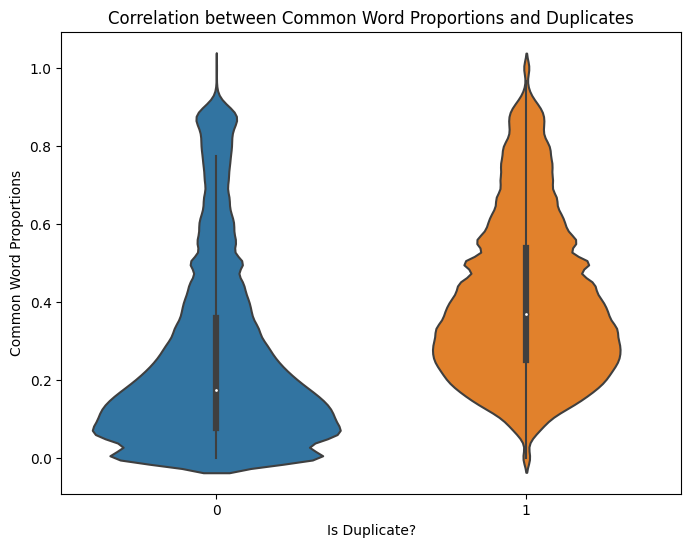

In [119]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='is_duplicate', y='common_word_proportion', data=df)
plt.xlabel('Is Duplicate?')
plt.ylabel('Common Word Proportions')
plt.title('Correlation between Common Word Proportions and Duplicates')
plt.show()

There is not much of a correlation between the word proportions and whether the question pair is a duplicate or not. This could be due to the presence of stopwords.

In [121]:
correlation_coefficient = df['common_word_proportion'].corr(df['is_duplicate'])
print(f"Correlation Coefficient: {correlation_coefficient}")

Correlation Coefficient: 0.32211416712834107


#### Excluding Stopwords

In [111]:
df['no_stops_question1'] = df['question1'].apply(lambda x: clean_text(x, remove_stopwords=True))
df['no_stops_question2'] = df['question2'].apply(lambda x: clean_text(x, remove_stopwords=True))

In [112]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,cleaned_question1,cleaned_question2,question1_word_count,question2_word_count,common_word_proportion,no_stops_question1,no_stops_question2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,14,12,0.769231,step step guide invest share market india,step step guide invest share market
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,what is the story of kohinoor kohinoor diamond,what would happen if the indian government sto...,8,13,0.250000,story kohinoor kohinoor diamond,would happen indian government stole kohinoor ...
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,14,10,0.142857,increase speed internet connection using vpn,internet speed increased hacking dns
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,why am i mentally very lonely how can i solve it,find the remainder when math2324math is divide...,11,9,0.000000,mentally lonely solve,find remainder math2324math divided 2423
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,13,7,0.111111,one dissolve water quikly sugar salt methane c...,fish would survive salt water


In [113]:
df['common_word_proportion_no_stops'] = df.apply(lambda row: calculate_common_word_proportion(row['no_stops_question1'], row['no_stops_question2']), axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,cleaned_question1,cleaned_question2,question1_word_count,question2_word_count,common_word_proportion,no_stops_question1,no_stops_question2,common_word_proportion_no_stops
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,14,12,0.769231,step step guide invest share market india,step step guide invest share market,0.833333
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,what is the story of kohinoor kohinoor diamond,what would happen if the indian government sto...,8,13,0.250000,story kohinoor kohinoor diamond,would happen indian government stole kohinoor ...,0.222222
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,14,10,0.142857,increase speed internet connection using vpn,internet speed increased hacking dns,0.222222
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,why am i mentally very lonely how can i solve it,find the remainder when math2324math is divide...,11,9,0.000000,mentally lonely solve,find remainder math2324math divided 2423,0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,13,7,0.111111,one dissolve water quikly sugar salt methane c...,fish would survive salt water,0.153846


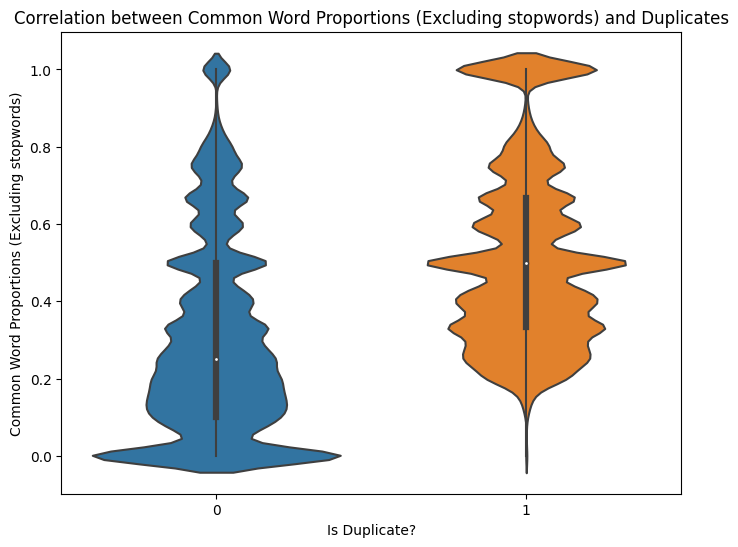

In [118]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='is_duplicate', y='common_word_proportion_no_stops', data=df)
plt.xlabel('Is Duplicate?')
plt.ylabel('Common Word Proportions (Excluding stopwords)')
plt.title('Correlation between Common Word Proportions (Excluding stopwords) and Duplicates')
plt.show()

It can be observed from the plot above that there is a small correlation between the proportion of common words (excluding stopwords) and whether the question pair is a duplicate or not.

If the proportion of common words is low (close to zero), them there is a high probability that it is not a duplicate.

In this example, we treat all words equally. We can use TF-IDF to weigh each word so that if an uncommon word appears in both questions, it can be mean there is a higher chance of the questions being duplicates.

In [122]:
correlation_coefficient = df['common_word_proportion_no_stops'].corr(df['is_duplicate'])
print(f"Correlation Coefficient: {correlation_coefficient}")

Correlation Coefficient: 0.39608368464612853


#### TF-IDF to weigh the common words (TODO)

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

# fit questions
tfidf_matrix = vectorizer.fit_transform(df['question1'] + ' ' + df['question2'])

In [105]:
tfidf_matrix.shape

(404287, 86152)

In [123]:
# add code for TF-IDF calculations

### Difference in Question Length

Check if there is a correlation between question having the same lengths and the question pair being a duplicate

There doesn't seem to be a correlation, so the `question_length_diff` feature may not be too useful.

In [124]:
df['question_length_diff'] = abs(df['question1_word_count'] - df['question2_word_count'])

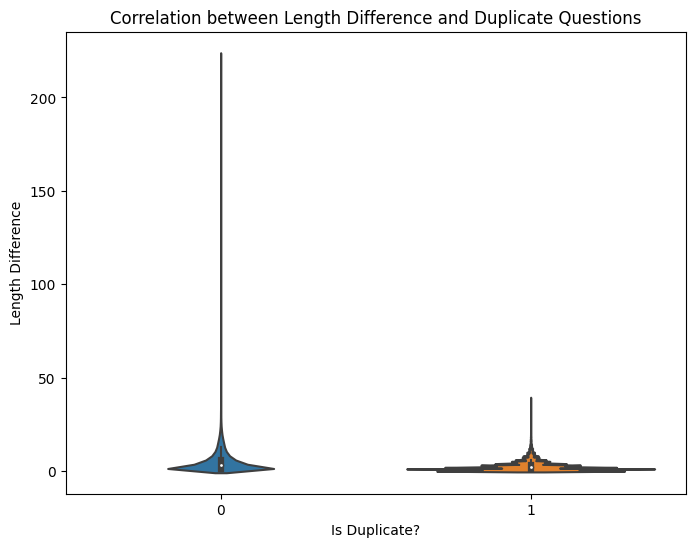

In [125]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='is_duplicate', y='question_length_diff', data=df)
plt.xlabel('Is Duplicate?')
plt.ylabel('Length Difference')
plt.title('Correlation between Length Difference and Duplicate Questions')
plt.show()

There is not much correlation, this feature might not be too important.

In [126]:
correlation_coefficient = df['question_length_diff'].corr(df['is_duplicate'])
print(f"Correlation Coefficient: {correlation_coefficient}")

Correlation Coefficient: -0.20110413237618785


### **Extra - Haven't tried out:** Data Cleaning

Haven't ran the code below as I am unsure if it would be correct

In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=296bc8edb5fe226c65cb6784e3b87c3ddd99c8554a7a69b0b50599398d93cfe4
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
# Code that has not been tested out
import re
from langdetect import detect

df = df.copy()

def is_english(text):
  try:
    return detect(text) == 'en'
  except:
    return False

df['question1'] = df['question1'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', ' ', x))
df['question2'] = df['question2'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', ' ', x))
df = df[df['question1'].apply(is_english) & df['question2'].apply(is_english)]